In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score

# --- Mount Google Drive ---
drive.mount('/content/drive')

project_path = "/content/drive/MyDrive/Heart_Disease_Project"
data_path = os.path.join(project_path, "data")
os.makedirs(data_path, exist_ok=True)

# --- Load dataset ---
df = pd.read_csv(os.path.join(data_path, "cleaned_heart.csv"))
print("Dataset shape:", df.shape)

X = df.drop("target", axis=1)
y = df["target"]

Mounted at /content/drive
Dataset shape: (303, 19)


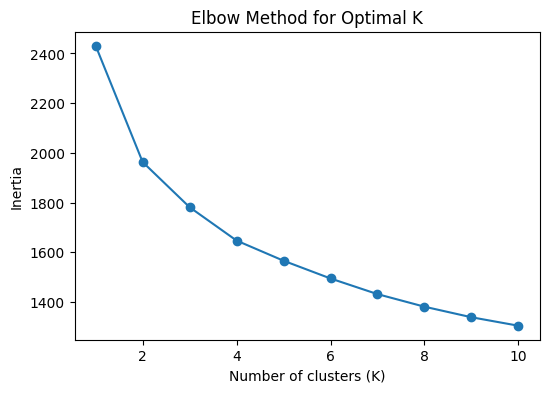

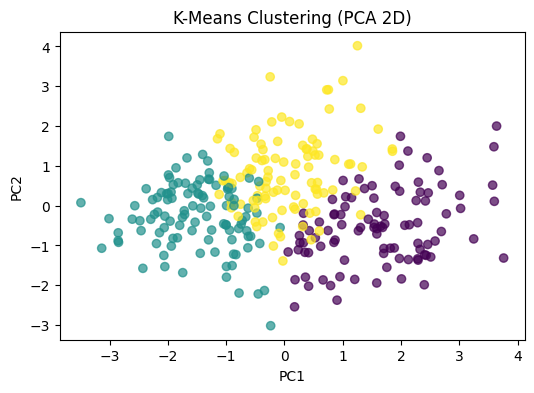

In [2]:
# Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis", alpha=0.7)
plt.title("K-Means Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


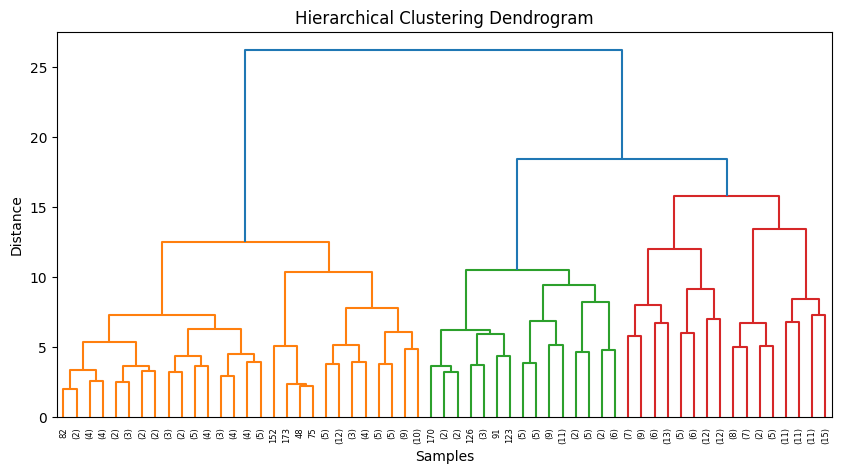

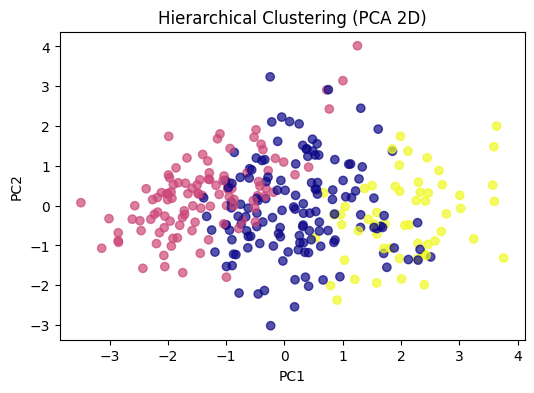

In [3]:
linked = linkage(X, method="ward")

plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

hier = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
hier_labels = hier.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=hier_labels, cmap="plasma", alpha=0.7)
plt.title("Hierarchical Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [4]:
print("K-Means ARI:", adjusted_rand_score(y, kmeans_labels))
print("Hierarchical ARI:", adjusted_rand_score(y, hier_labels))
print("K-Means Silhouette Score:", silhouette_score(X, kmeans_labels))
print("Hierarchical Silhouette Score:", silhouette_score(X, hier_labels))

K-Means ARI: 0.16143838100266983
Hierarchical ARI: 0.15423273048197997
K-Means Silhouette Score: 0.12964439786287715
Hierarchical Silhouette Score: 0.0883734293662567


In [5]:
cluster_df = X.copy()
cluster_df["KMeans_Cluster"] = kmeans_labels
cluster_df["Hierarchical_Cluster"] = hier_labels
cluster_df["target"] = y

cluster_file = os.path.join(data_path, "clustered_heart.csv")
cluster_df.to_csv(cluster_file, index=False)
print("Clustered dataset saved at:", cluster_file)

Clustered dataset saved at: /content/drive/MyDrive/Heart_Disease_Project/data/clustered_heart.csv
